In [26]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [27]:
sys.path.insert(0, '../')
from scale_rl.common.wandb_utils import *

#### Collect Results

##### UTD Scaling

In [37]:
entity = 'draftrec'
project_name = 'HyperSimba_2412'
run_exp_names_to_analysis_exp_names = {
    'sac_rr2_no_obs': 'sac',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [38]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names)
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
run_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
run_eval_df

100%|██████████| 60/60 [00:29<00:00,  2.04it/s]


,exp_name,env_name,seed,metric,env_step,value
0,sac,quadruped-walk,2000,avg_return,0,53.386231
1,sac,quadruped-walk,2000,avg_return,100000,140.719052
2,sac,quadruped-walk,2000,avg_return,200000,141.338187
3,sac,quadruped-walk,2000,avg_return,300000,10.942867
4,sac,quadruped-walk,2000,avg_return,400000,112.510093
...,...,...,...,...,...,...
1315,sac,quadruped-run,4000,avg_success,600000,0.000000
1316,sac,quadruped-run,4000,avg_success,700000,0.000000
1317,sac,quadruped-run,4000,avg_success,800000,0.000000
1318,sac,quadruped-run,4000,avg_success,900000,0.000000


In [72]:
eval_df = read_and_concatenate_eval_df(directory_path='../results/temp')
print(eval_df['exp_name'].unique())
eval_df

['simba_utd2']


,exp_name,env_name,seed,metric,env_step,value
0,simba_utd2,dog_trot,0,avg_return,0.0,10.229937
1,simba_utd2,dog_trot,0,avg_return,50000.0,64.202362
2,simba_utd2,dog_trot,0,avg_return,100000.0,148.874287
3,simba_utd2,dog_trot,0,avg_return,150000.0,258.045214
4,simba_utd2,dog_trot,0,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
26585,simba_utd2,HalfCheetah_v4,0,avg_success,800000.0,0.000000
26586,simba_utd2,HalfCheetah_v4,0,avg_success,850000.0,0.000000
26587,simba_utd2,HalfCheetah_v4,0,avg_success,900000.0,0.000000
26588,simba_utd2,HalfCheetah_v4,0,avg_success,950000.0,0.000000


In [73]:
#eval_df = pd.concat([eval_df, run_eval_df])
eval_df = eval_df[eval_df['env_name'].isin(MUJOCO_ALL)]
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,simba_utd2,dog_trot,0,avg_return,0.0,10.229937
1,simba_utd2,dog_trot,0,avg_return,50000.0,64.202362
2,simba_utd2,dog_trot,0,avg_return,100000.0,148.874287
3,simba_utd2,dog_trot,0,avg_return,150000.0,258.045214
4,simba_utd2,dog_trot,0,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
26585,simba_utd2,HalfCheetah_v4,0,avg_success,800000.0,0.000000
26586,simba_utd2,HalfCheetah_v4,0,avg_success,850000.0,0.000000
26587,simba_utd2,HalfCheetah_v4,0,avg_success,900000.0,0.000000
26588,simba_utd2,HalfCheetah_v4,0,avg_success,950000.0,0.000000


In [74]:
save_eval_df(eval_df, directory_path='../results/temp')

In [61]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [62]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE, HB_LOCOMOTION_NOHAND_MINI
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [63]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)

MUJOCO_RANDOM_SCORE = replace_hyphen_in_dict_keys(MUJOCO_RANDOM_SCORE)
MUJOCO_TD3_SCORE = replace_hyphen_in_dict_keys(MUJOCO_TD3_SCORE)
HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)

eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac,h1_pole_v0,9000,avg_return,0.0,6.142818
1,sac,h1_pole_v0,9000,avg_return,50000.0,26.364329
2,sac,h1_pole_v0,9000,avg_return,100000.0,29.562695
3,sac,h1_pole_v0,9000,avg_return,150000.0,29.845020
4,sac,h1_pole_v0,9000,avg_return,200000.0,36.981388
...,...,...,...,...,...,...
19935,sac,quadruped_run,4000,avg_success,600000.0,0.000000
19936,sac,quadruped_run,4000,avg_success,700000.0,0.000000
19937,sac,quadruped_run,4000,avg_success,800000.0,0.000000
19938,sac,quadruped_run,4000,avg_success,900000.0,0.000000


In [64]:
#cur_exp_names = [
#    'bro_utd10',
#]
cur_exp_names = eval_df['exp_name'].unique()
cur_exp_names

array(['sac'], dtype=object)

/home/leehojoon/simbav2-master/analysis/../scale_rl/common/wandb_utils.py:293: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


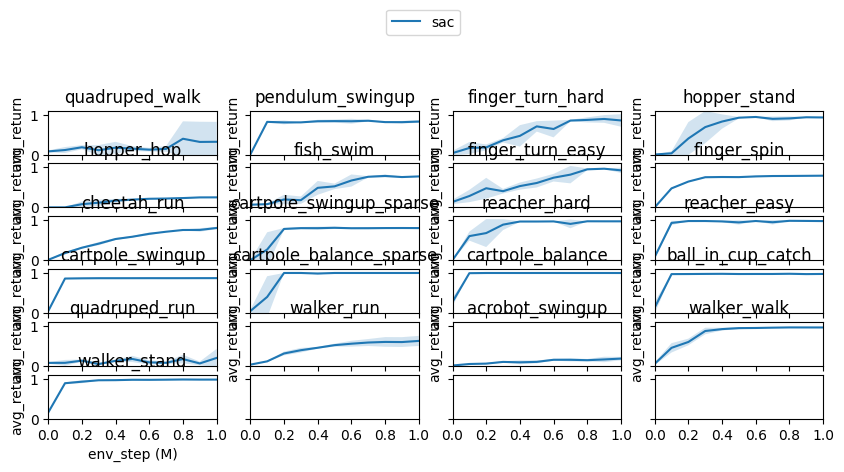

In [65]:
all_metric_mats = defaultdict(list)

for env_type in ['DMC_EM']:
    # ['MUJOCO', 'DMC_EM', 'DMC_HARD', 'MYOSUITE', 'HB_LOCOMOTION_NOHAND']:
    if env_type == "DMC_EM":
        env_list = DMC_EASY_MEDIUM
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 1.1

    elif env_type == 'DMC_HARD':
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 2.5
        y_lim_max=1.1

    elif env_type == 'MYOSUITE':
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = 'avg_success'
        plot_height=6 # 2.5
        y_lim_max=1.1

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=2.0

    # Filter eval_df for current environment set and experiments
    _eval_df = eval_df[eval_df["env_name"].isin(env_list)]
    _eval_df = _eval_df[_eval_df["exp_name"].isin(cur_exp_names)]

    if env_type == 'MUJOCO':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            MUJOCO_RANDOM_SCORE,
            MUJOCO_TD3_SCORE,
        )

    elif env_type in ['DMC_EM', 'DMC_HARD']:
        _eval_df.loc[:, 'value'] /= 1000.0

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    # (Optional) plot metric history for each environment in this env_type
    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    # Generate metric matrix dictionary for this env_type
    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, env_step=env_step, metric_type=metric_type
    )

    # Collect these matrices into all_metric_mats
    for exp_name, mat in _metric_matrix_dict.items():
        all_metric_mats[exp_name].append(mat)


In [66]:
metric_matrix_dict = {}
for exp_name, mats_list in all_metric_mats.items():
    # Find the minimum number of seeds among all matrices in mats_list
    min_num_seeds = min(mat.shape[1] for mat in mats_list)
    
    # Slice each matrix to keep only the first min_num_seeds columns
    mats_sliced = [mat[:, :min_num_seeds] for mat in mats_list]
    
    # Concatenate vertically
    # Resulting shape: [sum_of_envs_across_env_types, min_num_seeds]
    metric_matrix_dict[exp_name] = np.concatenate(mats_sliced, axis=0)

aggregate_scores = {}
aggregate_score_cis= {}

# Loop over each experiment (key) separately
for exp_name, mat in metric_matrix_dict.items():
    # We pass a small dict with just this experiment's data
    single_exp_dict = {exp_name: mat}
    
    # Compute interval estimates for only this experiment
    single_scores, single_cis = rly.get_interval_estimates(
        single_exp_dict,
        aggregate_func,  # e.g. rly.aggregate_iqm or custom
        reps=10000
    )
    
    # Store the result back into all_agg_scores, all_agg_cis
    # single_scores[exp_name] is something like [IQM, Median, Mean, Optimality Gap]
    aggregate_scores[exp_name] = single_scores[exp_name]
    aggregate_score_cis[exp_name] = single_cis[exp_name]

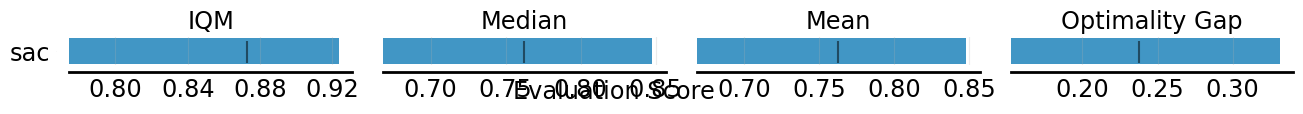

In [67]:
fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [71]:
aggregate_scores['sac'][2] - aggregate_score_cis['sac'][0][2]

0.09385860207327357

In [69]:
aggregate_score_cis

{'sac': array([[0.77460557, 0.66841912, 0.66841912, 0.15218063],
        [0.92339989, 0.84781937, 0.84781937, 0.33158088]])}